In [2]:
import pandas as pd

column_names = [
    'area', 'perimeter', 'compactness',
    'kernel_length', 'kernel_width',
    'asymmetry_coeff', 'kernel_groove_len',
    'class_label'
]

df = pd.read_csv('seeds_dataset.txt', delimiter='\t', on_bad_lines='skip', header=None, names=column_names)
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
# 결측치 확인인
df.isna().sum()

area                 0
perimeter            0
compactness          0
kernel_length        0
kernel_width         0
asymmetry_coeff      0
kernel_groove_len    0
class_label          0
dtype: int64

In [4]:
X = df.drop(columns='class_label')
Y= df['class_label']
Y = pd.get_dummies(Y)
Y

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
194,False,False,True
195,False,False,True
196,False,False,True
197,False,False,True


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

print(y_train.shape)

(159, 3)


In [ ]:
from keras import Sequential, Model
from keras.layers import Dense,Input
from keras.optimizers import Adam

inputs = Input(shape=(7,))
x = Dense(64, activation='relu')(inputs)
x2 = Dense(32, activation='relu')(x)
x3 = Dense(16, activation='relu')(x2)
prediction = Dense(3, activation='softmax')(x3)

model = Model(inputs=inputs, outputs=prediction)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,171 (12.39 KB)

 Trainable params: 3,171 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 학습 및 예측
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=16, validation_split= 0.2)
y_pred = model.predict(X_test)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2337 - loss: 1.2867 - val_accuracy: 0.4062 - val_loss: 1.0625
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2735 - loss: 1.1665 - val_accuracy: 0.6250 - val_loss: 1.0597
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4877 - loss: 1.0894 - val_accuracy: 0.4062 - val_loss: 1.0465
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5101 - loss: 1.0515 - val_accuracy: 0.5938 - val_loss: 0.9957
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4818 - loss: 1.0380 - val_accuracy: 0.6562 - val_loss: 0.9991
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4938 - loss: 1.0211 - val_accuracy: 0.3750 - val_loss: 1.0115
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4700 - loss: 0.9974 - val_accuracy: 0.7500 - val_loss: 0.9824
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4858 - loss: 1.0001 - val_accuracy: 0.5938 - val_loss: 0.9410


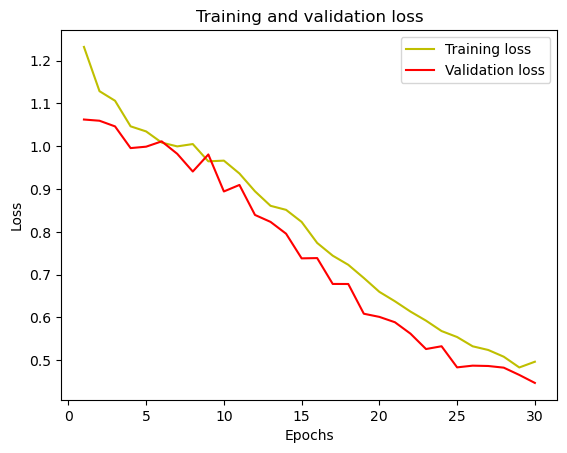

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show()

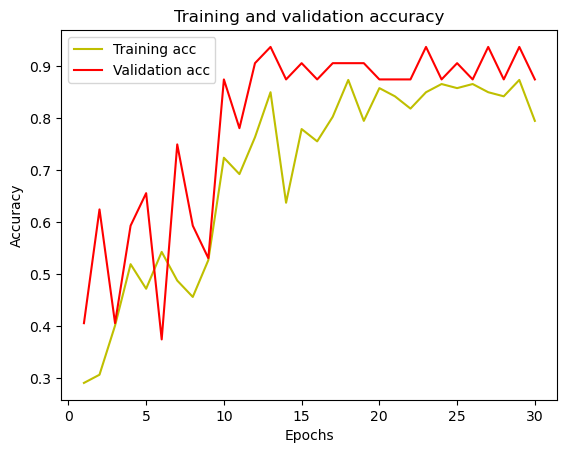

In [9]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()